# B455: Project 4

Serena Patel

(04/17/2020)

output: pdf

The objective of this assignment is to predict the 'chance of admit' by utilizing the other parameters.

The graduate admissions data had nine columns, or attributes. Each serial number for each admission application corresponded to an appliant who had a GRE Score, TOEFL score, undergraduate GPA, research experience, the strength of the statement of purpose, and the strength of the letter of recommendation. The university rating was also considered. All these features considered result in the Chance of Admit.

We will be able to predict the Chance of Admit by understanding our data individually and wholistically. Then we will implement different prediction models to find the chance of admit, and we will find the best model as well. 


#Data Exploration

In [0]:
# reading in the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("Admission_Predict.csv")

data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In our data exploration, we learn about the data for the individual features. We see that with a total of 400 values, and none of them missing, we have complete data set with nine features, or columns. There are 400 serial numbers which correspond to each data point, or each applicant. The following eight features are the more intersting data points because they are correlated to the Chance of Admit, the thing we are trying to predict. We are most interested in the mean and standard deviation of the data set. This will tell us the average test score, GPA, university ranking, strength of recommendation, and number of people participating in research. We also see the average chance of being admitted in this datset. The standard deviation tells us the rate of change within each column. This tells us how close together the values in each column are to one another. The lower the value, the closer together the values are to one another. This also allows us to understand the spread of the data points. 
We see that there seems to be pretty high averages across the board for all the features and realtively low standard deviation values, so that means that our data is extremely similar, with probably a few outliers. 

#Data Visualization

Now that we understand the data of the individual features, we can look at the data from a wholistic, and more visual, point of view to understand the correlation between the features. 

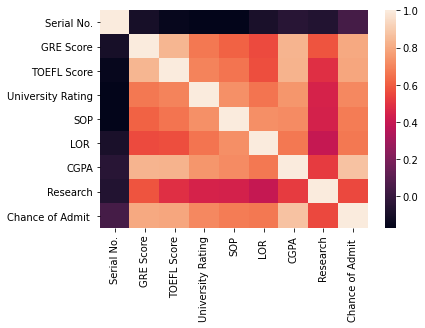

In [0]:
corr = data.corr() 
sns.heatmap(corr,
            xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values)

From the heatmap, we find that the following three characteristics are the most highly coorelated to the Chance of Admit.
  1. GRE Score
  2. TOEFL Score
  3. CGPA (college GPA)

We can create a subgroup to understand the coorelation between these three features as well. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to c

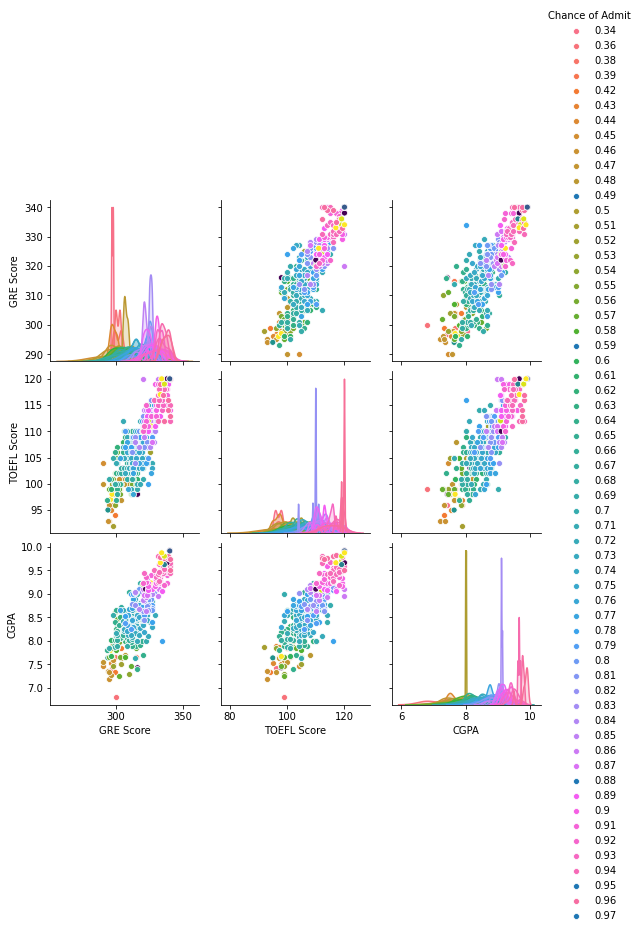

In [0]:
#create a sub-group]
subGroup = data[['Chance of Admit ', 'GRE Score', 'TOEFL Score', 'CGPA']]

sns.pairplot(subGroup, hue = 'Chance of Admit ')

Text(0.5, 1.0, 'CGPA vs Chance of Admit')

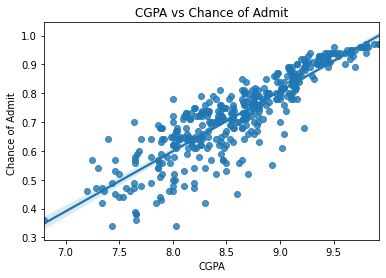

In [0]:
sns.regplot(data['CGPA'], data['Chance of Admit '])
plt.title('CGPA vs Chance of Admit')

Text(0.5, 1.0, 'GRE Score vs Chance of Admit')

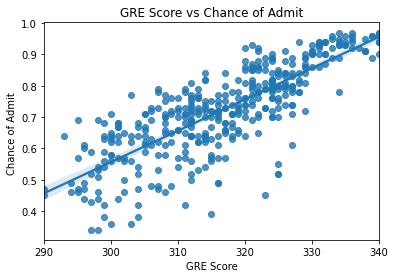

In [0]:
sns.regplot(data['GRE Score'], data['Chance of Admit '])
plt.title('GRE Score vs Chance of Admit')

Text(0.5, 1.0, 'TOEFL Score vs Chance of Admit')

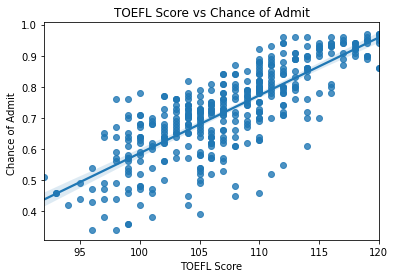

In [0]:
sns.regplot(data['TOEFL Score'], data['Chance of Admit '])
plt.title('TOEFL Score vs Chance of Admit')

Text(0.5, 1.0, 'Chance of Admit Distribution')

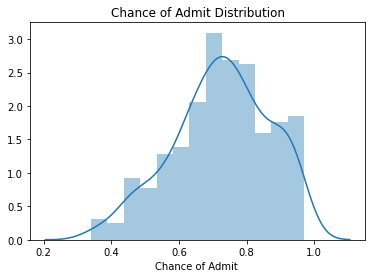

In [0]:
sns.distplot(data['Chance of Admit '])
plt.title('Chance of Admit Distribution')

We utilized a pairsplot, linear regression plot, and a distribution plot to show the distribution of data and their relationship with the Chance of Admit. 
We see that there is a strong corrleation between the features of GRE Score, CGPA, and TOEFL Score. And a normal distribution of Chance of Admit that is more right skewed, which shows there is a higher Chance of Admit in general. 


We can conclude that there are three features of interest in this dataset that are the most highly related to the Chance of Admit. These features have a positive coorelation to the Chance of Admit. The higher the values of the CGPA, TOEFL Score, and GRE Score, the higher the Chance of Admit is. 

#Data Preprocessing

We want to split our data into the target data, which is the Chance of Admit, and the feature data, which is anything but the Chance of Admit. 
We also want to have a fair test size to have even shapes of both. 
We also use the scalar functionality to standardize our data a bit.

In [0]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [0]:
target = data['Chance of Admit ']
feature = data.drop(columns = {'Chance of Admit '})

X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [0]:
print(X_train.shape)
print(X_test.shape)

(320, 8)
(80, 8)


In [0]:
print(Y_train.shape)
print(Y_test.shape)

(320,)
(80,)


In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Model 1: Linear Regression

Here, we run the sklearn linear regression model and return the prediction score for the linear regression model. 

I chose a linear regression model because we are understanding the relationship between the variables. The linear regression model tells us about the strength and the accuracy of the relationships between our target and feature values. 

In [0]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_predict = lr.predict(X_test)
lr_score = (lr.score(X_test, Y_test))*100
lr_score

kfold = KFold(n_splits=10, random_state=0)
scores = cross_val_score(lr, X, y, cv=kfold)

mse = mean_squared_error(Y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_predict)

print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)


Root Mean Squared Error :  0.0688163295988108
R-Squared Error: 0.8166122714445566


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


#Model 2: Decision Tree

Here, we run the sklearn decision tree regression model and return the prediction score for the decision tree model.

I chose a decision tree becuase of the structure of the problem. Essentially, we are going through each feature and deciding how that applicant, or data point, is classified for that feature and as we traverse through each feature, we get to the end where we decide if that applicant is admitted or not.  

In [0]:
dt = DecisionTreeRegressor(random_state=0, max_depth=6)
dt.fit(X_train, Y_train)
y_predict = dt.predict(X_test)
decison_tree_score = dt.score(X_test, Y_test)*100
decison_tree_score

kfold = KFold(n_splits=10, random_state=0)
scores = cross_val_score(lr, X, y, cv=kfold)

mse = mean_squared_error(Y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_predict)

print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)

Root Mean Squared Error :  0.08044591614403096
R-Squared Error: 0.7493918072287037


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


#Model 3 : Random Forests

Here, we run the sklearn random forest regression model and return the prediction score for the random forest model.

The random forest regression model is useful for similar reasons the decision tree model is useful. 
"It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression of the individual trees."
(Random Forest Regression)

In [0]:
rf = RandomForestRegressor(n_estimators=110,max_depth=6,random_state=0)
rf.fit(X_train, Y_train)
y_predict = rf.predict(X_test)
forest_score = (rf.score(X_test, Y_test))*100
forest_score

kfold = KFold(n_splits=10, random_state=0)
scores = cross_val_score(lr, X, y, cv=kfold)

mse = mean_squared_error(Y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_predict)

print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)

Root Mean Squared Error :  0.06679308466320044
R-Squared Error: 0.8272371888552761


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


#Performance Evaluation

Utilizing k-fold cross validation to evaluate our three model outputs by comparing the metrics of the root mean squared error and the r-squared value. 

R-squared (R2)
* "which is the proportion of variation in the outcome that is explained by the predictor variables. In multiple regression models, R2 corresponds to the squared correlation between the observed outcome values and the predicted values by the model. The Higher the R-squared, the better the model"
* Linear Regression : 0.8166122714445566
* Decision Tree : 0.7493918072287037
* Random Forests: 0.8272371888552761


Root Mean Squared Error (RMSE) 
  * "which measures the average error performed by the model in predicting the outcome for an observation. Mathematically, the RMSE is the square root of the mean squared error (MSE), which is the average squared difference between the observed actual outome values and the values predicted by the model. So, MSE = mean((observeds - predicteds)^2) and RMSE = sqrt(MSE). The lower the RMSE, the better the model"

* Linear Regression : 0.0688163295988108
* Decision Tree : 0.08044591614403096
* Random Forests: 0.06679308466320044

From this, we can see that the random forests model performed the best.

#Conclusion

With our dataset, we are trying to predict the chance of admit. 
I evaluated the dataset individually and wholistically to understand the relations it had between the features and our target. This was done by looking at the data numerically and by visual evaluation. I think utilized three different types of models to predict the Chance of Admit. I used a linear regression model because we are trying to connect features and the target to get an accurate prediction. I used a decision tree model because the way that problem is set up is in a tree like structure, therefore utilizing a decision tree would allow us to get a predicition for the Chance of Admit. The third model used was the Random Forests model which aggregates multiple decision trees to, essentially, amplify the output of the decision tree model. I analyzed our data by using an r-squared and a root mean squared error measurement from the k-fold cross validation to evaluate the best performing model. The random forests model is the best performing because she has highest r-squared value and the lowest root mean squared error value. 

#Resources



*   [Train/Test Split and Cross Validation in Python](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)
*   [Visualizing linear relationships](https://seaborn.pydata.org/tutorial/regression.html)
* [Regression Model Accuracy Metrics](http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/)
* [Random Forest Regression](https://towardsdatascience.com/random-forest-and-its-implementation-71824ced454f)

Data Source: https://www.kaggle.com/mohansacharya/graduate-admissions

